In [1]:
# Run if working locally
%load_ext autoreload
%autoreload 2

In [2]:
import sqlite3
from sqlite3 import Error
import pickle
import os, sys
import config

config.root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, config.root_path)

from src.dataset.dataset import RawData
from src.dataset.wikisection_preprocessing import (
    tokenize,
    clean_sentence,
    preprocess_text_segmentation,
    format_data_for_db_insertion,
)
from src.dataset.utils import truncate_by_token
from db.dbv2 import Table, AugmentedTable, TrainTestTable
import pprint


from utils.metrics import windowdiff, pk

from src.bertkeywords.src.similarities import Embedding, Similarities
from src.bertkeywords.src.keywords import Keywords
from src.encoders.coherence_v2 import Coherence
from src.dataset.utils import flatten, dedupe_list, truncate_string
from src.experimentation.coherence_v2 import SimpleExperiment, CoherenceExperiment

/Users/mac/miniforge3/envs/phd/lib/python3.8/site-packages/transformers/utils/generic.py:462: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/mac/miniforge3/envs/phd/lib/python3.8/site-packages/transformers/utils/generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [5]:
experimentation = SimpleExperiment()

# constants
NUM_SAMPLES = 2500
#         MODEL_STRING="bert-base-uncased",
#         MODEL_STRING="sentence-transformers/LaBSE",
MODEL_STRING = "roberta-base"
# MODEL_STRING = "sentence-transformers/all-MiniLM-L6-v2"
GRAPHS = True
METRICS_SUMMARY = False
PREDICTIONS_SUMMARY = True
BATCH_SIZE = 7

# ----------------------------------------------------

# city experiments

# without coherence dump
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string=MODEL_STRING,
        max_words_per_step=3,
        start=5000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=False,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
    )
)

# without SWM
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string=MODEL_STRING,
        max_words_per_step=3,
        start=5000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=1,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=True,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
    )
)


# without NSWP
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string=MODEL_STRING,
        max_words_per_step=3,
        start=5000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=1,
        kb_embeddings=True,
        coherence_dump_on_prediction=True,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
    )
)

# disease experiments

# without coherence dump
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string=MODEL_STRING,
        max_words_per_step=3,
        start=5000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=False,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
    )
)

# without SWM
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string=MODEL_STRING,
        max_words_per_step=3,
        start=5000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=1,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=True,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
    )
)


# without NSWP
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string=MODEL_STRING,
        max_words_per_step=3,
        start=5000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=1,
        kb_embeddings=True,
        coherence_dump_on_prediction=True,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
    )
)

In [ ]:
# clinical, fiction, wiki

experimentation = SimpleExperiment()

# constants
NUM_SAMPLES = 250
#         MODEL_STRING="bert-base-uncased",
#         MODEL_STRING="sentence-transformers/LaBSE",
MODEL_STRING = "roberta-base"
# MODEL_STRING = "sentence-transformers/all-MiniLM-L6-v2"
GRAPHS = True
METRICS_SUMMARY = False
PREDICTIONS_SUMMARY = True
BATCH_SIZE = 25

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="clinical",
        model_string=MODEL_STRING,
        max_words_per_step=8,
        start=5000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=False,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=26,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.4,
        diverse_keywords=True,
        similar_keywords=True,
    )
)

In [ ]:
experimentation.run()

In [65]:
experimentation = SimpleExperiment()

# constants
NUM_SAMPLES = 250
# MODEL_STRING="bert-base-uncased",
MODEL_STRING="sentence-transformers/LaBSE"
# MODEL_STRING="TaylorAI/bge-micro-v2"
# MODEL_STRING = "roberta-base"
# MODEL_STRING = "sentence-transformers/all-MiniLM-L6-v2"
GRAPHS = True
METRICS_SUMMARY = False
PREDICTIONS_SUMMARY = True
BATCH_SIZE = 10

# ----------------------------------------------------

# city experiments

# without coherence dump
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string=MODEL_STRING,
        max_words_per_step=6,
        start=0,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=False,
        coherence_threshold=0.5,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=25,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=True,
        similar_keywords=True,
    )
)

Running experiment set: qBd5u
Running experiment: CoherenceExperiment(num_samples=250, start=0, dataset_type='disease', model_string='sentence-transformers/LaBSE', max_words_per_step=6, same_word_multiplier=2, no_same_word_penalty=2, prediction_threshold=0.47, coherence_threshold=0.5, coherence_dump_on_prediction=False, pruning=1, pruning_min=25, dynamic_threshold=False, threshold_warmup=10, last_n_threshold=5, kb_embeddings=True, experiment_hash='hlUSy', batch_size=10, keyword_diversity=0.3, diverse_keywords=True, similar_keywords=True, ablation=False, print_metrics_summary=False, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_disease


No sentence-transformers model found with name bert-base-uncased. Creating a new one with MEAN pooling.


TOTAL BATCHES: 25

......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 

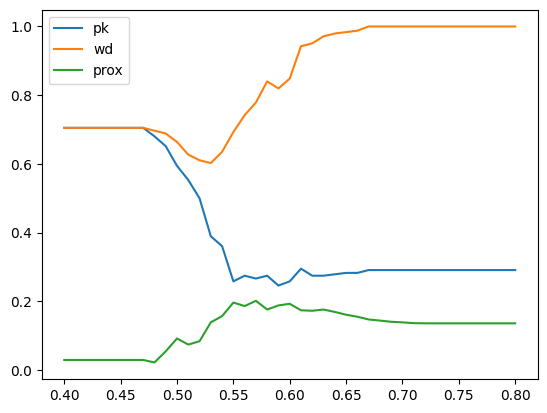

============= Predictions Summary =============
best pk: 0.2459016393442623, best prediction threshold: 0.59, proximity: 0.1881079203334877
P:[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
R:[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [66]:
experimentation.run()

### =========================================================

### Testing proximity metrics

In [71]:
# fmt: off
predictions=[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
real=[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
# fmt: on

<IPython.core.display.Javascript object>

In [72]:
def check_proximity(predictions, real, proximity=2):
    exact_matches = 0
    very_close_matches = 0  # within 1 step
    close_matches = 0  # within 2 steps

    for i, (p, r) in enumerate(zip(predictions, real)):
        # take care of all the cases where we're at the
        # beginning of the arrays
        prev_idx = i - 1
        prev_prev_idx = i - 2
        if i == 0 or i == 1:
            prev_idx = 0
            prev_prev_idx = 0

        prev_prediction = predictions[prev_idx]
        prev_prev_prediction = predictions[prev_prev_idx]

        # take care of all the cases where we're at the
        # end of the arrays
        next_idx = i + 1
        next_next_idx = i + 2
        if i == (len(predictions) - 1):
            next_idx = i
            next_next_idx = i
        if i == (len(predictions) - 2):
            next_idx = i + 1
            next_next_idx = i + 1

        next_prediction = predictions[next_idx]
        next_next_prediction = predictions[next_next_idx]

        if r == 1 and p == 1:
            exact_matches += 1
            continue
        if r == 1:
            if prev_prediction == 1 or next_prediction == 1:
                very_close_matches += 1
                continue
            if prev_prev_prediction == 1 or next_next_prediction == 1:
                close_matches += 1
                continue
            continue

    return exact_matches, very_close_matches, close_matches

<IPython.core.display.Javascript object>

In [73]:
exact_matches, close_matches, very_close_matches = check_proximity(predictions, real)

<IPython.core.display.Javascript object>

In [74]:
exact_matches, close_matches, very_close_matches, predictions.count(1), real.count(1)

(11, 0, 1, 15, 39)

<IPython.core.display.Javascript object>

In [75]:
num_positive_predictions = predictions.count(1)
num_real_positives = real.count(1)

<IPython.core.display.Javascript object>

In [76]:
print("Predictions ----->")
print(
    f"Percentage of positive predictions made that are within proximity of 2: {100*close_matches/num_positive_predictions}"
)
print(
    f"Percentage of positive predictions made that are within proximity of 1: {100*very_close_matches/num_positive_predictions}"
)
print(
    f"Percentage of positive predictions made that are exact matches: {100*exact_matches/num_positive_predictions}"
)
print("Real ----->")
print(
    f"Percentage of real predictions made that are within proximity of 2: {100*close_matches/num_real_positives}"
)
print(
    f"Percentage of real predictions made that are within proximity of 1: {100*very_close_matches/num_real_positives}"
)
print(
    f"Percentage of real predictions made that are exact matches: {100*exact_matches/num_real_positives}"
)

Predictions ----->
Percentage of positive predictions made that are within proximity of 2: 0.0
Percentage of positive predictions made that are within proximity of 1: 6.666666666666667
Percentage of positive predictions made that are exact matches: 73.33333333333333
Real ----->
Percentage of positive predictions made that are within proximity of 2: 0.0
Percentage of positive predictions made that are within proximity of 1: 2.5641025641025643
Percentage of positive predictions made that are exact matches: 28.205128205128204


<IPython.core.display.Javascript object>

In [82]:
proximity = (
    (1 / 3 * (close_matches / num_real_positives))
    + (1 / 2 * (very_close_matches / num_real_positives))
    + (exact_matches / num_real_positives)
) / (
    (1 / 3 * (close_matches / num_positive_predictions))
    + (1 / 2 * (very_close_matches / num_positive_predictions))
    + (exact_matches / num_positive_predictions)
)

<IPython.core.display.Javascript object>

In [84]:
proximity

0.38461538461538464

<IPython.core.display.Javascript object>

In [90]:
numerator = (
    (1 / 3 * (close_matches / num_real_positives))
    + (1 / 2 * (very_close_matches / num_real_positives))
    + (exact_matches / num_real_positives)
)

denominator = (
    (1 / 3 * (close_matches / num_positive_predictions))
    + (1 / 2 * (very_close_matches / num_positive_predictions))
    + (exact_matches / num_positive_predictions)
)

num_real_positives, num_positive_predictions, numerator, denominator

(39, 15, 0.2948717948717949, 0.7666666666666666)

<IPython.core.display.Javascript object>

In [92]:
numerator * denominator, denominator / numerator

(0.22606837606837607, 2.5999999999999996)

<IPython.core.display.Javascript object>